<a href="https://colab.research.google.com/github/cxbxmxcx/PAIGCP/blob/master/PAIGCP_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as DS

Load

In [ ]:
(x_train, y_train), (x_test, y_test) = DS.load_data()

In [ ]:
class_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Normalize

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
import math
import matplotlib

def plot_data(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28),cmap='Greys')
      plt.xlabel(class_names[labels[i]])      
  plt.show()

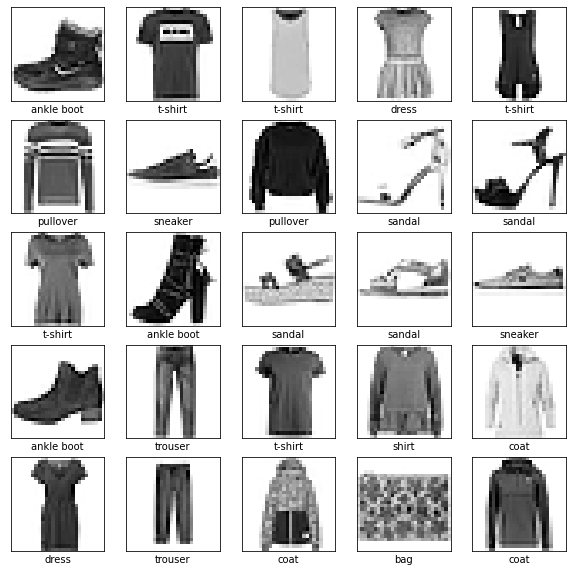

In [ ]:
plot_data(25, x_train, y_train)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [ ]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Hyperparameters

* Learning Rate
* Batch Size
* Epochs


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - val_loss: 0.0168
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0129 - val_loss: 0.0129
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127 - val_loss: 0.0129
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
generated = autoencoder.predict(x_test)

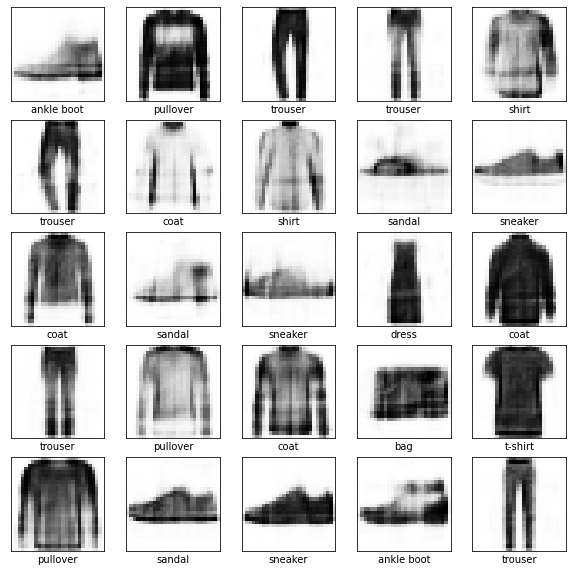

In [ ]:
plot_data(25, generated, y_test)